In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
chase_data = pd.read_csv("The_Chase__Dataset.csv")
chase_data.head()

,p_1_gender,p_1_age,p_1_fast_round_sum,p_1_play_sum_chosen,p1_round_status,p_2_gender,p_2_age,p_2_fast_round_sum,p_2_play_sum_chosen,p_2_round_status,...,p_3_round_status,p_4_gender,p_4_age,p_4_fast_round_sum,p_4_play_sum_chosen,p_4_round_status,team_total_sum,question_answered,game_result,season
0,male,30,20000,20000,1,female,27,50000,50000,1,...,1,female,30,30000,30000,0,105000,19,0,1
1,male,45,35000,35000,1,female,67,30000,30000,0,...,1,male,33,50000,160000,1,215000,23,0,1
2,female,33,25000,25000,1,male,57,20000,20000,1,...,1,male,32,40000,140000,0,60000,23,0,1
3,male,34,35000,35000,1,female,29,30000,30000,1,...,1,male,32,20000,90000,0,90000,24,1,1
4,male,50,30000,90000,0,female,38,35000,35000,1,...,1,male,30,25000,25000,0,70000,18,0,1


#### Reshaping the data for easier accesss

When concatenating dataframes, they all need to have the exact same column names

In [5]:
#renaming column to match the other's format
chase_data = chase_data.rename(columns={"p1_round_status":"p_1_round_status"}) 

#selecting all rows from colums p_1_gender through p1_round_status
p1 = chase_data.loc[:,'p_1_gender':'p_1_round_status'] 
p2 = chase_data.loc[:,'p_2_gender':'p_2_round_status']
p3 = chase_data.loc[:,'p_3_gender':'p_3_round_status']
p4 = chase_data.loc[:,'p_4_gender':'p_4_round_status']

#renaming each column to the same thing so they could be concatenated
p1 = p1.rename(columns={"p_1_gender":"gender","p_1_age":"age",
                        "p_1_fast_round_sum":"fast_round_sum","p_1_play_sum_chosen":"sum_chosen",
                        "p_1_round_status":"round_status"})
p2 = p1.rename(columns={"p_2_gender":"gender","p_2_age":"age",
                        "p_2_fast_round_sum":"fast_round_sum","p_2_play_sum_chosen":"sum_chosen",
                        "p_2_round_status":"round_status"})
p3 = p1.rename(columns={"p_3_gender":"gender","p_3_age":"age",
                        "p_3_fast_round_sum":"fast_round_sum","p_3_play_sum_chosen":"sum_chosen",
                        "p_3_round_status":"round_status"})
p4 = p1.rename(columns={"p_4_gender":"gender","p_4_age":"age",
                        "p_4_fast_round_sum":"fast_round_sum","p_4_play_sum_chosen":"sum_chosen",
                        "p_4_round_status":"round_status"})

#concatanation
players = pd.concat([p1,p2,p3,p4], axis=0, ignore_index=True)
players.head()

,gender,age,fast_round_sum,sum_chosen,round_status
0,male,30,20000,20000,1
1,male,45,35000,35000,1
2,female,33,25000,25000,1
3,male,34,35000,35000,1
4,male,50,30000,90000,0


### Research questions for combined plot #1

1. Percantage of participants' genders
2. Distribution of the participants' ages
3. Round 1 win sums by number of people
4. Round 2 success percentage

In [6]:
#calculate round 2 win/lose percentage:
#win: round the number of the division of the players number who won the round by the total players number, devided by 100
#lose: subtract the win percentage from 100

r2_win_percent = round(len(players[players.round_status == 1])/len(players)*100, 0)
r2_lose_percent = 100 - r2_win_percent

#same but with fale/female ratio

male_percent = round(len(players[players.gender == "male"])/len(players)*100, 0)
female_percent = 100 - male_percent
gender_percent = pd.DataFrame({'gender':['Male', 'Female'], 'value':[male_percent, female_percent]})

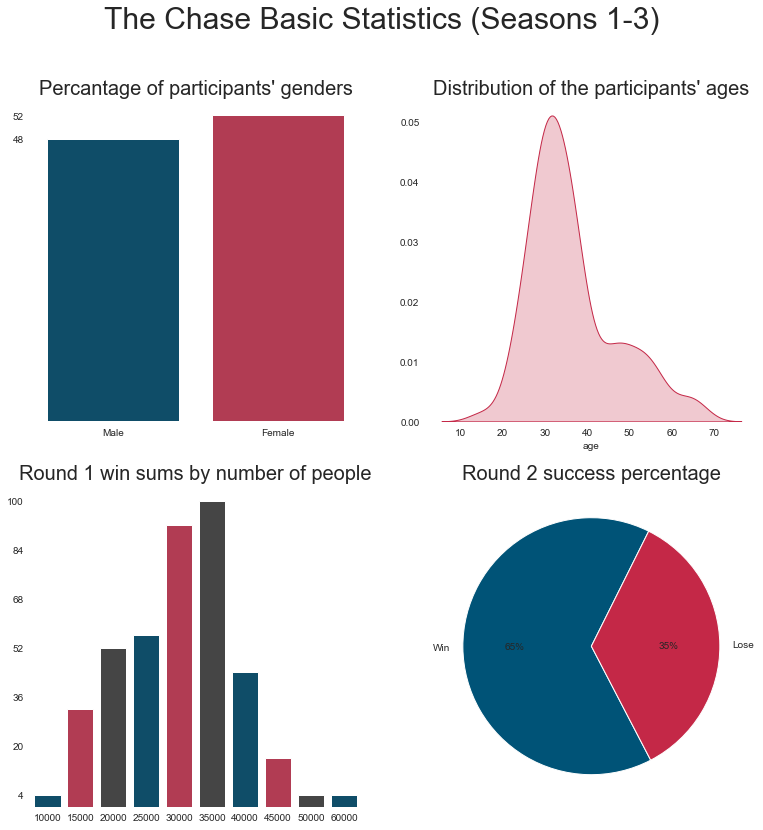

In [25]:
#cearing subplots, color palette, title

sns.set_style("white")
fig, axs = plt.subplots(2,2, figsize=(13,13)) 
colors = ["#005377", '#c42847', '#454545']
fig.suptitle("The Chase Basic Statistics (Seasons 1-3)", size = 30)

#creating barplot using previously analyzed data (inserted into a dataframe) as x and y axis
sns.barplot(ax = axs[0,0], x=gender_percent.gender, y=gender_percent.value, palette = colors)
axs[0,0].set_title("Percantage of participants' genders", size = 20)
axs[0,0].set_yticks([male_percent,female_percent])
axs[0,0].set(xlabel= '', ylabel='')
axs[0,0].set_frame_on(False)

#creatigna kdeplot of age disribution
sns.kdeplot(ax = axs[0,1], data=players.age, shade=True, color = "#c42847")
axs[0,1].set_frame_on(False)
axs[0,1].set_title("Distribution of the participants' ages", size = 20)
axs[0,1].set(ylabel='')

#creating a countplot 
sns.countplot(ax = axs[1,0], data=players, x='fast_round_sum', palette = colors)
axs[1,0].set_title('Round 1 win sums by number of people', size = 20)
axs[1,0].set_frame_on(False)
axs[1,0].set(xlabel = '', ylabel='')
axs[1,0].set_yticks(range(4,101,16))

#creating piechart using previously analyzed data
axs[1,1].pie([r2_win_percent, r2_lose_percent], labels=["Win", "Lose"], autopct='%1.0f%%', startangle=63.5,
             colors = colors)
axs[1,1].set_title('Round 2 success percentage', size = 20)


plt.savefig ("Basic_statistics.png",bbox_inches ="tight", dpi=300)
plt.show()

### Research Question for plot #2

Presenting ranges of the sums which were won by participants in each season

In [10]:
sum_won = chase_data.loc[:,['team_total_sum', 'game_result', 'season']] #extracting relevant columns 
sum_won = sum_won[sum_won.game_result==1] #leaving only the rows that match the condition
total = sum_won.team_total_sum.sum() # calculating the sum of all wins

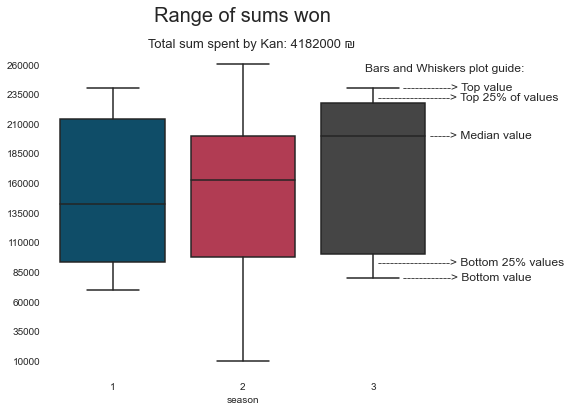

In [24]:
sns.set_style("white")
fig, ax = plt.subplots(1,1, figsize=(7,6))
ax.set_title('Range of sums won\n', size = 20)
ax.set_frame_on(False)

sns.boxplot(x='season', y='team_total_sum', data=sum_won, palette = colors)
ax.set(ylabel='')
ax.set_yticks(range(sum_won.team_total_sum.min(), sum_won.team_total_sum.max()+1, 25000))

#adding text to the figure
fig.text(0.325, 0.885, f'Total sum spent by Kan: {total} ₪', fontsize=13)

# explanation about box and whiskers graph 

fig.text(0.755, 0.83, 'Bars and Whiskers plot guide:', fontsize=12)
fig.text(0.83, 0.785, '------------> Top value', fontsize=12)
fig.text(0.78, 0.762, '------------------> Top 25% of values', fontsize=12)
fig.text(0.885, 0.675, '-----> Median value', fontsize=12)
fig.text(0.78, 0.38, '------------------> Bottom 25% values', fontsize=12)
fig.text(0.83, 0.345, '------------> Bottom value', fontsize=12)
             
plt.savefig ("Ranges_of_sums.png",bbox_inches ="tight", dpi=300)
plt.show()